In [1]:
import talib
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [2]:
stock_data= pd.read_csv('EURAUD_Candlestick_4_Hour_BID-ASK_12.12.2012-12.12.2020.csv')
stock_data                        

,Gmt time,Volume,Open,High,Low,Close
0,12.12.2012 00:00:00.000,11011.3902,1.234920,1.235890,1.233830,1.235200
1,12.12.2012 04:00:00.000,13271.5599,1.235210,1.235510,1.233860,1.234340
2,12.12.2012 08:00:00.000,26716.2305,1.234350,1.236370,1.233305,1.234905
3,12.12.2012 12:00:00.000,28430.1602,1.234910,1.237285,1.234850,1.236810
4,12.12.2012 16:00:00.000,33124.1904,1.236800,1.238700,1.236285,1.238205
...,...,...,...,...,...,...
12885,11.12.2020 04:00:00.000,19540.2200,1.607955,1.608915,1.604095,1.605455
12886,11.12.2020 08:00:00.000,48969.4700,1.605465,1.611820,1.605225,1.609935
12887,11.12.2020 12:00:00.000,49848.5000,1.609930,1.611365,1.606575,1.606745
12888,11.12.2020 16:00:00.000,23094.5300,1.606720,1.609540,1.605880,1.607315


In [3]:
# BETWEEN OPEN AND CLOSE
# If Datetime is in string only the 1st that is day was being comapred
stock_data['Gmt time']=pd.to_datetime(stock_data['Gmt time'])

def return_data_for_period():
    date1=input("Enter first Date for time period format D.M.Y :- ")
    date2=input("Enter Second Date for time period format D.M.Y :- ")
    date1=date1.split(".")
    date2=date2.split(".")
    date1=datetime.datetime(year=int(date1[2]),month=int(date1[1]),day=int(date1[0]))
    date2=datetime.datetime(year=int(date2[2]),month=int(date2[1]),day=int(date2[0]))
    date_filt1=stock_data[stock_data["Gmt time"]>date1]
    return date_filt1[date_filt1["Gmt time"]<date2]

Enter first Date for time period format D.M.Y :- 01.05.2020
Enter Second Date for time period format D.M.Y :- 01.05.2022


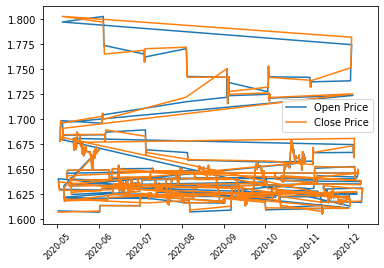

In [4]:
open_Close_filtered_Data=return_data_for_period()
plt.plot(open_Close_filtered_Data['Gmt time'],open_Close_filtered_Data['Open'],label="Open Price")
plt.plot(open_Close_filtered_Data['Gmt time'],open_Close_filtered_Data['Close'],label="Close Price")
plt.xticks(rotation=45,fontsize=8)
plt.legend()
plt.show()

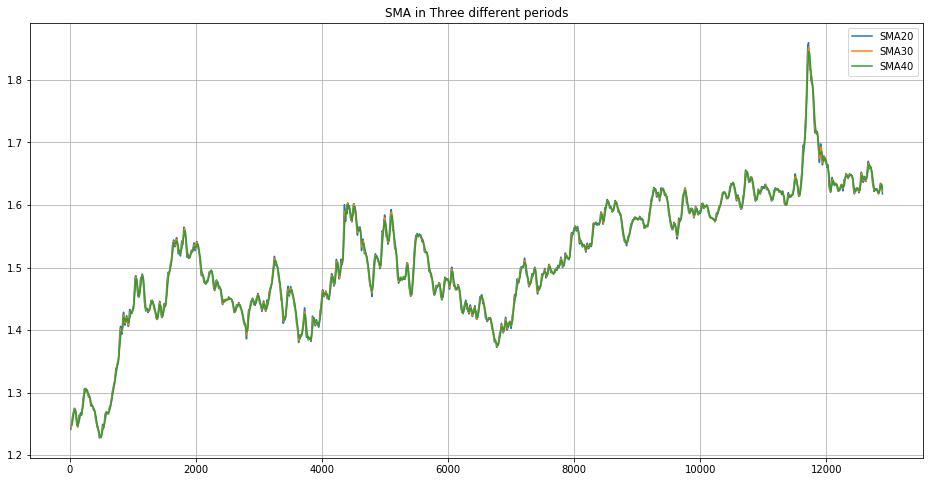

In [5]:
#SIMPLE MOVING AVARAGE

stock_data['SMA20'] = talib.SMA(stock_data['Close'], timeperiod=20)
stock_data['SMA30'] = talib.SMA(stock_data['Close'], timeperiod=30)
stock_data['SMA40'] = talib.SMA(stock_data['Close'], timeperiod=40)
plt.figure(figsize=(16, 8))
plt.plot(stock_data['SMA20'], label='SMA20')
plt.plot(stock_data['SMA30'], label='SMA30')
plt.plot(stock_data['SMA40'], label='SMA40')
# plt.plot(stock_data['Close'], label='Close')
plt.legend()
plt.grid(True)
plt.title('SMA in Three different periods')
plt.show()

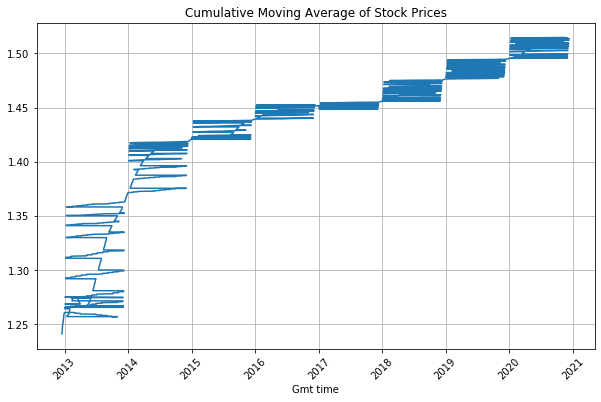

In [6]:
#CUMULATIVE MOVING AVARAGE
stock_data['CMA20'] = stock_data['Close'].expanding(min_periods=20).mean()
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Gmt time'], stock_data['CMA20'])
plt.xlabel('Gmt time')
plt.title('Cumulative Moving Average of Stock Prices')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

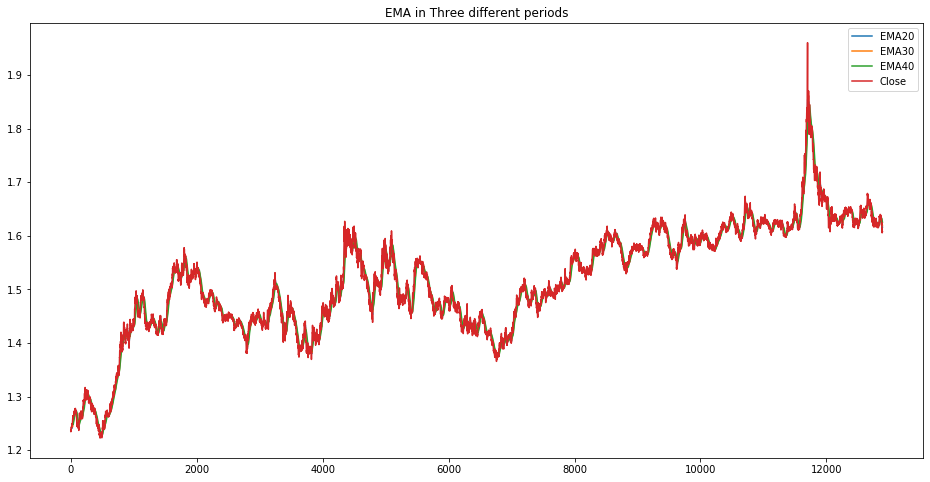

In [7]:
#EXPONENTIAL MOVING AVERAGE

stock_data['EMA20'] = talib.EMA(stock_data['Close'], timeperiod=20)
stock_data['EMA30'] = talib.EMA(stock_data['Close'], timeperiod=30)
stock_data['EMA40'] = talib.EMA(stock_data['Close'], timeperiod=40)
plt.figure(figsize=(16, 8))
plt.plot(stock_data['EMA20'], label='EMA20')
plt.plot(stock_data['EMA30'], label='EMA30')
plt.plot(stock_data['SMA40'], label='EMA40')
plt.plot(stock_data['Close'], label='Close')
plt.legend()
plt.title('EMA in Three different periods')
plt.show()

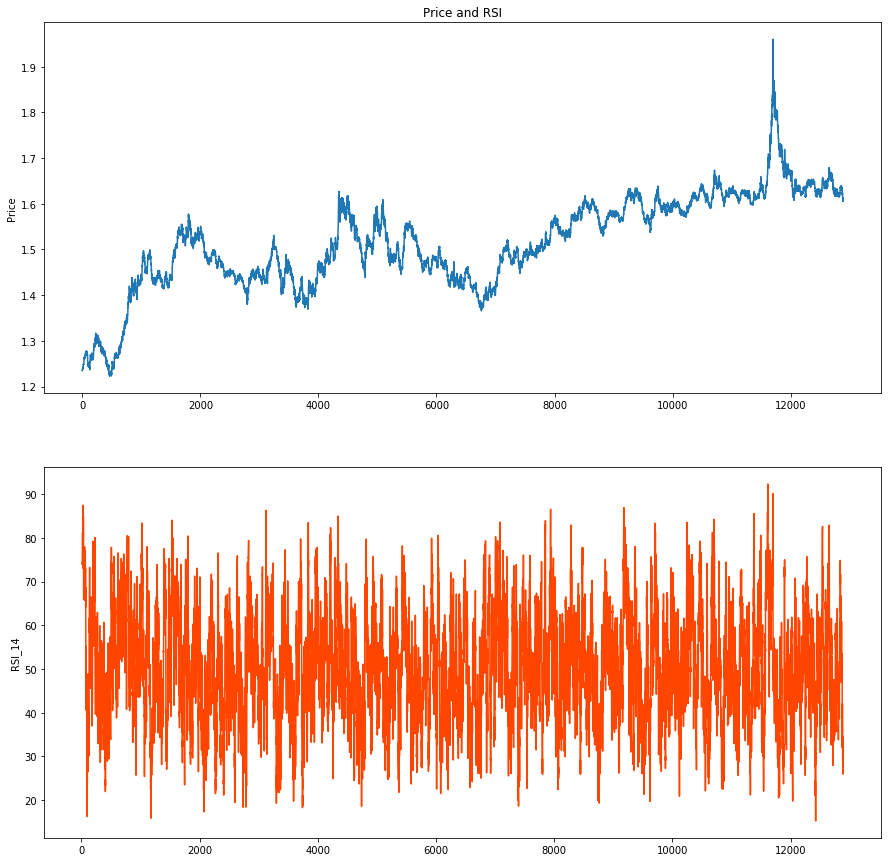

In [8]:
# RSI

stock_data['RSI_14'] = talib.RSI(stock_data['Close'],timeperiod = 14)

# Calculate RSI with a time period of 30
stock_data['RSI_30'] = talib.RSI(stock_data['Close'], timeperiod = 30)
stock_data['RSI_40'] = talib.RSI(stock_data['Close'], timeperiod = 40)

# Print the last five rows
#print(stock_data.tail())

fig, (ax1, ax2) = plt.subplots(2, figsize=(15,15))
# Plot RSI with the price
ax1.set_ylabel('Price')
ax1.plot(stock_data['Close'])
ax2.set_ylabel('RSI_14')
ax2.plot(stock_data['RSI_14'], color='orangered')

ax1.set_title('Price and RSI')
plt.show()

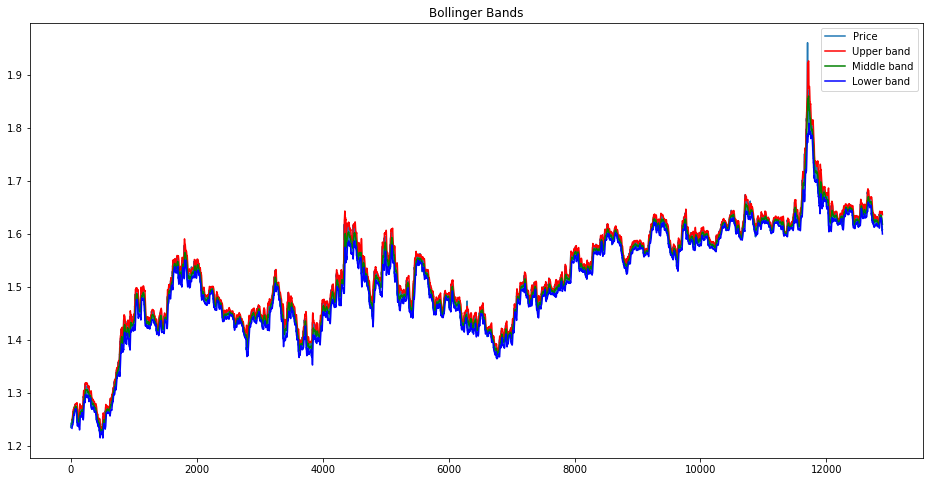

In [9]:
#Bollinger Bands 

upper, mid, lower = talib.BBANDS(stock_data['Close'],
                                 nbdevup=2,
                                 nbdevdn=2,
                                 timeperiod=20)

plt.figure(figsize=(16, 8))

# Plot the Bollinger Bands 
plt.plot(stock_data['Close'], label='Price')
plt.plot(upper, color='Red' , label='Upper band')
plt.plot(mid, color='Green', label='Middle band')
plt.plot(lower, color='blue', label='Lower band')

# Customize and show the plot
plt.title('Bollinger Bands')
plt.legend()
plt.show()

In [10]:
stock_data.fillna(0)

,Gmt time,Volume,Open,High,Low,Close,SMA20,SMA30,SMA40,CMA20,EMA20,EMA30,EMA40,RSI_14,RSI_30,RSI_40
0,2012-12-12 00:00:00,11011.3902,1.234920,1.235890,1.233830,1.235200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2012-12-12 04:00:00,13271.5599,1.235210,1.235510,1.233860,1.234340,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2012-12-12 08:00:00,26716.2305,1.234350,1.236370,1.233305,1.234905,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2012-12-12 12:00:00,28430.1602,1.234910,1.237285,1.234850,1.236810,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2012-12-12 16:00:00,33124.1904,1.236800,1.238700,1.236285,1.238205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12885,2020-11-12 04:00:00,19540.2200,1.607955,1.608915,1.604095,1.605455,1.622749,1.626085,1.628154,1.514703,1.619856,1.622656,1.624083,25.962439,35.694715,38.649210
12886,2020-11-12 08:00:00,48969.4700,1.605465,1.611820,1.605225,1.609935,1.621672,1.625305,1.627558,1.514711,1.618911,1.621835,1.623393,34.488261,39.603727,41.554823
12887,2020-11-12 12:00:00,49848.5000,1.609930,1.611365,1.606575,1.606745,1.620331,1.624479,1.626822,1.514718,1.617752,1.620862,1.622581,31.689908,37.906388,40.165575
12888,2020-11-12 16:00:00,23094.5300,1.606720,1.609540,1.605880,1.607315,1.619021,1.623639,1.626230,1.514725,1.616758,1.619988,1.621836,32.740071,38.394433,40.529940


In [11]:
stock_data

,Gmt time,Volume,Open,High,Low,Close,SMA20,SMA30,SMA40,CMA20,EMA20,EMA30,EMA40,RSI_14,RSI_30,RSI_40
0,2012-12-12 00:00:00,11011.3902,1.234920,1.235890,1.233830,1.235200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-12-12 04:00:00,13271.5599,1.235210,1.235510,1.233860,1.234340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-12-12 08:00:00,26716.2305,1.234350,1.236370,1.233305,1.234905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-12-12 12:00:00,28430.1602,1.234910,1.237285,1.234850,1.236810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-12-12 16:00:00,33124.1904,1.236800,1.238700,1.236285,1.238205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12885,2020-11-12 04:00:00,19540.2200,1.607955,1.608915,1.604095,1.605455,1.622749,1.626085,1.628154,1.514703,1.619856,1.622656,1.624083,25.962439,35.694715,38.649210
12886,2020-11-12 08:00:00,48969.4700,1.605465,1.611820,1.605225,1.609935,1.621672,1.625305,1.627558,1.514711,1.618911,1.621835,1.623393,34.488261,39.603727,41.554823
12887,2020-11-12 12:00:00,49848.5000,1.609930,1.611365,1.606575,1.606745,1.620331,1.624479,1.626822,1.514718,1.617752,1.620862,1.622581,31.689908,37.906388,40.165575
12888,2020-11-12 16:00:00,23094.5300,1.606720,1.609540,1.605880,1.607315,1.619021,1.623639,1.626230,1.514725,1.616758,1.619988,1.621836,32.740071,38.394433,40.529940


In [12]:
stock_data['price_change']= stock_data['Close'].diff()
stock_data['label']=0

for i in range(len(stock_data)-1):
    if stock_data.loc[i+1,'price_change']>0:
        stock_data.loc[i,'label']=1
stock_data.loc[len(stock_data)]=0
stock_data

,Gmt time,Volume,Open,High,Low,Close,SMA20,SMA30,SMA40,CMA20,EMA20,EMA30,EMA40,RSI_14,RSI_30,RSI_40,price_change,label
0,2012-12-12 00:00:00,11011.3902,1.234920,1.235890,1.233830,1.235200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2012-12-12 04:00:00,13271.5599,1.235210,1.235510,1.233860,1.234340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000860,1
2,2012-12-12 08:00:00,26716.2305,1.234350,1.236370,1.233305,1.234905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000565,1
3,2012-12-12 12:00:00,28430.1602,1.234910,1.237285,1.234850,1.236810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001905,1
4,2012-12-12 16:00:00,33124.1904,1.236800,1.238700,1.236285,1.238205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001395,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12886,2020-11-12 08:00:00,48969.4700,1.605465,1.611820,1.605225,1.609935,1.621672,1.625305,1.627558,1.514711,1.618911,1.621835,1.623393,34.488261,39.603727,41.554823,0.004480,0
12887,2020-11-12 12:00:00,49848.5000,1.609930,1.611365,1.606575,1.606745,1.620331,1.624479,1.626822,1.514718,1.617752,1.620862,1.622581,31.689908,37.906388,40.165575,-0.003190,1
12888,2020-11-12 16:00:00,23094.5300,1.606720,1.609540,1.605880,1.607315,1.619021,1.623639,1.626230,1.514725,1.616758,1.619988,1.621836,32.740071,38.394433,40.529940,0.000570,1
12889,2020-11-12 20:00:00,5512.4200,1.607310,1.608910,1.606925,1.607785,1.617706,1.622859,1.625571,1.514732,1.615904,1.619200,1.621151,33.645901,38.804710,40.834639,0.000470,0


In [14]:
stock_data = stock_data.drop('Close', axis=1)
stock_data = stock_data.drop('price_change', axis=1)


,Gmt time,Volume,Open,High,Low,SMA20,SMA30,SMA40,CMA20,EMA20,EMA30,EMA40,RSI_14,RSI_30,RSI_40,label
0,2012-12-12 00:00:00,11011.3902,1.234920,1.235890,1.233830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2012-12-12 04:00:00,13271.5599,1.235210,1.235510,1.233860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2012-12-12 08:00:00,26716.2305,1.234350,1.236370,1.233305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,2012-12-12 12:00:00,28430.1602,1.234910,1.237285,1.234850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,2012-12-12 16:00:00,33124.1904,1.236800,1.238700,1.236285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12886,2020-11-12 08:00:00,48969.4700,1.605465,1.611820,1.605225,1.621672,1.625305,1.627558,1.514711,1.618911,1.621835,1.623393,34.488261,39.603727,41.554823,0
12887,2020-11-12 12:00:00,49848.5000,1.609930,1.611365,1.606575,1.620331,1.624479,1.626822,1.514718,1.617752,1.620862,1.622581,31.689908,37.906388,40.165575,1
12888,2020-11-12 16:00:00,23094.5300,1.606720,1.609540,1.605880,1.619021,1.623639,1.626230,1.514725,1.616758,1.619988,1.621836,32.740071,38.394433,40.529940,1
12889,2020-11-12 20:00:00,5512.4200,1.607310,1.608910,1.606925,1.617706,1.622859,1.625571,1.514732,1.615904,1.619200,1.621151,33.645901,38.804710,40.834639,0


In [15]:
stock_data

,Gmt time,Volume,Open,High,Low,SMA20,SMA30,SMA40,CMA20,EMA20,EMA30,EMA40,RSI_14,RSI_30,RSI_40,label
0,2012-12-12 00:00:00,11011.3902,1.234920,1.235890,1.233830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2012-12-12 04:00:00,13271.5599,1.235210,1.235510,1.233860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2012-12-12 08:00:00,26716.2305,1.234350,1.236370,1.233305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,2012-12-12 12:00:00,28430.1602,1.234910,1.237285,1.234850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,2012-12-12 16:00:00,33124.1904,1.236800,1.238700,1.236285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12886,2020-11-12 08:00:00,48969.4700,1.605465,1.611820,1.605225,1.621672,1.625305,1.627558,1.514711,1.618911,1.621835,1.623393,34.488261,39.603727,41.554823,0
12887,2020-11-12 12:00:00,49848.5000,1.609930,1.611365,1.606575,1.620331,1.624479,1.626822,1.514718,1.617752,1.620862,1.622581,31.689908,37.906388,40.165575,1
12888,2020-11-12 16:00:00,23094.5300,1.606720,1.609540,1.605880,1.619021,1.623639,1.626230,1.514725,1.616758,1.619988,1.621836,32.740071,38.394433,40.529940,1
12889,2020-11-12 20:00:00,5512.4200,1.607310,1.608910,1.606925,1.617706,1.622859,1.625571,1.514732,1.615904,1.619200,1.621151,33.645901,38.804710,40.834639,0


In [26]:
stock_data.columns

Index(['Gmt time', 'Volume', 'Open', 'High', 'Low', 'SMA20', 'SMA30', 'SMA40',
       'CMA20', 'EMA20', 'EMA30', 'EMA40', 'RSI_14', 'RSI_30', 'RSI_40',
       'label'],
      dtype='object')

In [27]:
stock_data = stock_data.iloc[:,1:]

In [29]:
stock_data.dropna(inplace=True)

In [30]:
X=stock_data.iloc[:,:-1].values
y=stock_data.iloc[:,-1].values
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=52)


In [31]:
X_train

array([[4.55791797e+04, 1.42198500e+00, 1.42536000e+00, ...,
        5.33550397e+01, 4.91683394e+01, 4.86835362e+01],
       [5.10250196e+04, 1.22929000e+00, 1.23733000e+00, ...,
        6.49274053e+01, 5.38072842e+01, 5.05839811e+01],
       [2.08397203e+04, 1.42639500e+00, 1.43048000e+00, ...,
        5.36947126e+01, 4.65115362e+01, 4.51806027e+01],
       ...,
       [3.43446998e+04, 1.62946000e+00, 1.63047000e+00, ...,
        5.27597250e+01, 5.01184664e+01, 5.01219313e+01],
       [2.41557695e+04, 1.59609500e+00, 1.59659000e+00, ...,
        5.20760386e+01, 5.28957244e+01, 5.22449638e+01],
       [2.24987901e+04, 1.51098500e+00, 1.51303000e+00, ...,
        6.75246144e+01, 6.09183788e+01, 6.00015103e+01]])

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, confusion_matrix
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)
accuracy_rf=round(accuracy_score(y_test,Y_prediction)* 100, 2)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)



cm = confusion_matrix(y_test, Y_prediction)
accuracy = accuracy_score(y_test,Y_prediction)
precision =precision_score(y_test, Y_prediction,average='micro')
recall =  recall_score(y_test, Y_prediction,average='micro')
f1 = f1_score(y_test,Y_prediction,average='micro')
print('Confusion matrix for Random Forest\n',cm)
print('accuracy_random_Forest : %.3f' %accuracy)
print('precision_random_Forest : %.3f' %precision)
print('recall_random_Forest : %.3f' %recall)
print('f1-score_random_Forest : %.3f' %f1)

Confusion matrix for Random Forest
 [[1046  927]
 [ 945  938]]
accuracy_random_Forest : 0.515
precision_random_Forest : 0.515
recall_random_Forest : 0.515
f1-score_random_Forest : 0.515


In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
accuracy_knn=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for KNN\n',cm)
print('accuracy_KNN : %.3f' %accuracy)
print('precision_KNN : %.3f' %precision)
print('recall_KNN: %.3f' %recall)

Confusion matrix for KNN
 [[1009  964]
 [1005  878]]
accuracy_KNN : 0.489
precision_KNN : 0.489
recall_KNN: 0.489
